In [1]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
else:
    print("Failed to detect a GPU.")


Found a GPU with the name: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [2]:
import cv2 
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,Dropout,ReLU,Conv2D,MaxPooling2D
from keras.applications import VGG16
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
#data AUGMENTATION
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,  
                                   zoom_range=0.2, horizontal_flip=True,
                                   validation_split=0.2) 
  
test_datagen = ImageDataGenerator(rescale=1. / 255, 
                                  validation_split=0.2) 

train_data=keras.preprocessing.image_dataset_from_directory(
    directory=r"C:\Users\aashutosh kumar\Music\data",
    labels="inferred",
    image_size=(150,150),
    validation_split=0.2,
    subset="training",
    label_mode="int",
    batch_size=32,
    seed=123,
)

val_data=keras.preprocessing.image_dataset_from_directory(
    directory=r"C:\Users\aashutosh kumar\Music\data",
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(150,150),
    batch_size=32,
)

Found 7553 files belonging to 2 classes.
Using 6043 files for training.
Found 7553 files belonging to 2 classes.
Using 1510 files for validation.


In [4]:
path=r"C:\Users\aashutosh kumar\Music\data"
classes=os.listdir(path)
classes.sort()
classes

['with_mask', 'without_mask']

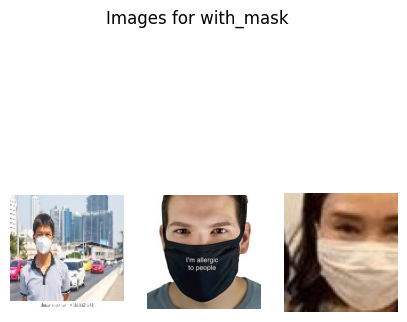

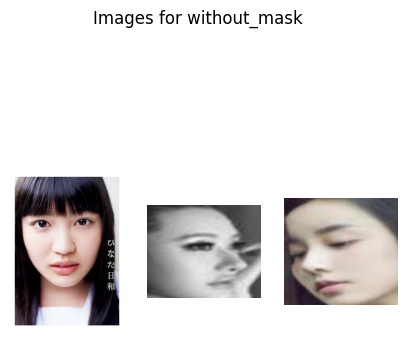

In [5]:
for i in classes:
    img_p=os.path.join(path,i)
    images=os.listdir(img_p)

    fig,ax=plt.subplots(1,3,figsize=(5,5))
    fig.suptitle(f"Images for {i}")

    for j in range(3):
        random=np.random.randint(0,len(images))
        img_path=os.path.join(img_p,images[random])
        img=cv2.imread(img_path)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        ax[j].imshow(img)
        ax[j].axis("off")

In [6]:
def normalize_(image,label):
    image=tf.cast(image/255.,tf.float32)
    return image,label

train_data=train_data.map(normalize_)
val_data=val_data.map(normalize_)

In [7]:
for images, labels in train_data.take(1):
    print(images.shape)  
    
for images, labels in val_data.take(1):
    print(images.shape)
    

(32, 150, 150, 3)
(32, 150, 150, 3)


In [8]:
conv_base=VGG16(include_top=False,weights="imagenet",input_shape=(150,150,3))
conv_base.trainable=False

In [9]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())

model.add(Dense(units=126,activation="relu"))
model.add(Dropout(0.33))

model.add(Dense(units=32,activation="relu"))
model.add(Dropout(0.33))

model.add(Dense(units=1,activation="sigmoid"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 126)               1032318   
                                                                 
 dropout (Dropout)           (None, 126)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4064      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [11]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [12]:
m=model.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10
189/189 [==============================] - 35s 136ms/step - loss: 0.2400 - accuracy: 0.9004 - val_loss: 0.0855 - val_accuracy: 0.9662
Epoch 2/10
189/189 [==============================] - 22s 117ms/step - loss: 0.0921 - accuracy: 0.9669 - val_loss: 0.0713 - val_accuracy: 0.9728
Epoch 3/10
189/189 [==============================] - 22s 115ms/step - loss: 0.0787 - accuracy: 0.9696 - val_loss: 0.0743 - val_accuracy: 0.9702
Epoch 4/10
189/189 [==============================] - 24s 123ms/step - loss: 0.0537 - accuracy: 0.9796 - val_loss: 0.0779 - val_accuracy: 0.9755
Epoch 5/10
189/189 [==============================] - 24s 124ms/step - loss: 0.0479 - accuracy: 0.9833 - val_loss: 0.0981 - val_accuracy: 0.9636
Epoch 6/10
189/189 [==============================] - 25s 130ms/step - loss: 0.0433 - accuracy: 0.9838 - val_loss: 0.0756 - val_accuracy: 0.9755
Epoch 7/10
189/189 [==============================] - 26s 136ms/step - loss: 0.0344 - accuracy: 0.9886 - val_loss: 0.0675 - val_ac

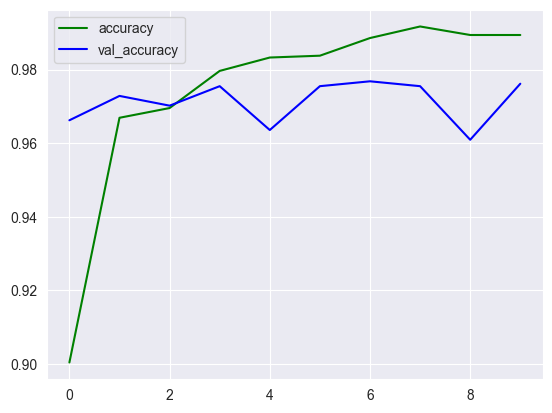

In [13]:
sns.set_style("darkgrid")
plt.plot(m.history["accuracy"],color="green")
plt.plot(m.history["val_accuracy"],color="blue")
plt.legend(["accuracy","val_accuracy"])

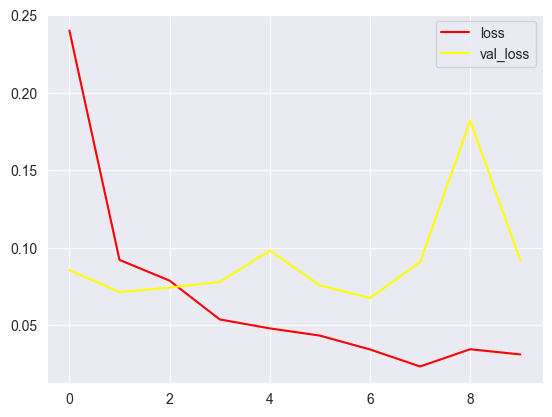

In [14]:
sns.set_style("darkgrid")
plt.plot(m.history["loss"],color="red")
plt.plot(m.history["val_loss"],color="yellow")
plt.legend(["loss","val_loss"])

In [15]:

from keras.models import load_model
model.save('Mask.model')

INFO:tensorflow:Assets written to: Mask.model\assets


INFO:tensorflow:Assets written to: Mask.model\assets


In [25]:
img=cv2.imread(r"D:\Backup\E\aashutosh JPG(178kb).JPEG")
img.shape

(1031, 1014, 3)

In [26]:
img=cv2.resize(img,(150,150))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

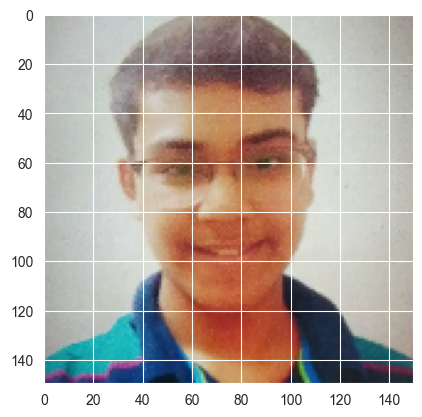

In [27]:
input=img.reshape(1,150,150,3)
plt.imshow(img)

In [28]:
res=model.predict(input)
print(res)

1/1 [==============================] - 0s 24ms/step
[[1.]]
